In [2]:
#run with python2
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
import pandas as pd
import io   

import warnings
warnings.filterwarnings('ignore')

#%matplotlib 

In [3]:
astroplan.download_IERS_A()

In [3]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)



In [15]:
from datetime import datetime,timezone
datetime.now(timezone.utc)

datetime.datetime(2025, 6, 5, 2, 6, 52, 225032, tzinfo=datetime.timezone.utc)

In [4]:
observer = astroplan.Observer.at_site('keck')

In [ ]:
dateutc = '2025-06-07 05:40:00'
today = Time(dateutc, scale='utc')
date = '07062025'

pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg eve twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg eve twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
#twi12deg = Time('2019-12-22 16:00:30.559', scale='utc')
print('12 deg morn twilight', twi12deg.iso)

start = Time(dateutc, scale='utc') + 15*u.min# start  '2025-01-01 04:45:00'  + 5min
# handoff = twi12deg-1*u.min # end -1 min
handoff = Time('2025-06-07 10:10:00')

12 deg eve twilight 2025-06-07 05:52:53.520
15 deg eve twilight 2025-06-07 06:07:43.286
18 deg eve twilight 2025-06-07 06:22:50.979
18 deg morn twilight 2025-06-07 14:18:43.618
15 deg morn twilight 2025-06-07 14:33:51.062
12 deg morn twilight 2025-06-07 14:48:41.305


In [6]:
Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6','+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522 
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5
HZ4           = astroplan.FixedTarget(coord=SkyCoord('03:55:21.7','+09:47:18',unit=(u.hourangle, u.degree)),
                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71') # V 13.032, proper motion (mas/yr) 76.728 -172.960 (DA1.5 C)
Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)


In [56]:
#Tellurics HIP29997 HIP41798 HIP55230 HIP54849

HIP29997 = astroplan.FixedTarget(coord=SkyCoord('06:18:50.7775136949','+69:19:11.331249516',unit=(u.hourangle, u.degree)),
                                      name='HIP29997')# V ~ 4.757, K ~ 4.672. pr motion mas/yr 1.816 -118.495 
HIP41798 = astroplan.FixedTarget(coord=SkyCoord('08:31:19.9662429960 ','+37:15:53.796537612',unit=(u.hourangle, u.degree)),
                                      name='HIP41798')# V ~ 6.174 , K ~ 6.258. pr motion mas/yr -15.222 -30.070
HIP55230 = astroplan.FixedTarget(coord=SkyCoord('11:18:37.4487119328','-33:45:12.400782228',unit=(u.hourangle, u.degree)),
                                      name='HIP55230')# V ~ 8.27 , K ~ 8.029. pr motion mas/yr 	-38.677 9.848 
HIP54849 = astroplan.FixedTarget(coord=SkyCoord('11:13:45.5531027136','-00:04:10.208010072',unit=(u.hourangle, u.degree)),
                                      name='HIP54849')# V ~ 5.404, K ~ 5.333. pr motion mas/yr -46.541 2.767

HIP16095 = astroplan.FixedTarget(coord=SkyCoord('03:27:18.68','+12:44:07.0',unit=(u.hourangle, u.degree)),
                                      name='HIP16095')# V ~ 6.29, K~ 6.311 . pr motion 9.713 -7.452 
 
HIP50303 = astroplan.FixedTarget(coord=SkyCoord('10:16:14.43','+29:18:37.7',unit=(u.hourangle, u.degree)),
                                      name='HIP50303')# V ~ 5.49, 
 
HIP26698 =  astroplan.FixedTarget(coord=SkyCoord('05:40:25.46','-22:38:54.0',unit=(u.hourangle, u.degree)),
                                      name='HIP26698')# V ~ 7.89 , K~7.642.  pr motion -0.509 -14.408

HIP45037 =  astroplan.FixedTarget(coord=SkyCoord('09:10:23.00','-23:10:36.1',unit=(u.hourangle, u.degree)),
                                      name='HIP45037')# V ~ 6.53 , K ~ 6.489.  pr motion  -33.289 5.161

HIP52324 =  astroplan.FixedTarget(coord=SkyCoord('10:41:30.34','-35:43:52.0',unit=(u.hourangle, u.degree)),
                                      name='HIP52324')# V ~ 6.82 , K~ 6.738. pr motion  -23.843 -4.291

HIP48414 =  astroplan.FixedTarget(coord=SkyCoord('09:52:12.16','+02:27:14.8',unit=(u.hourangle, u.degree)),
                                      name='HIP48414')# V ~ 6.02 , 
 
HIP45712 =  astroplan.FixedTarget(coord=SkyCoord('09:19:07.86','-22:33:11.0',unit=(u.hourangle, u.degree)),
                                      name='HIP45712')# V ~ 7.19
HIP75230  = astroplan.FixedTarget(coord=SkyCoord('15:22:23.24','+12:34:03.0',unit=(u.hourangle, u.degree)),
                                      name='HIP75230')# V ~ 6.29
HIP77111  = astroplan.FixedTarget(coord=SkyCoord('15:44:42.13','+17:15:51.2',unit=(u.hourangle, u.degree)),
                                      name='HIP77111')# V ~ 6.15
HIP87108 = astroplan.FixedTarget(coord=SkyCoord('17:47:53.56','+02:42:26.2',unit=(u.hourangle, u.degree)),
                                      name='HIP87108')# V ~ 3.75
HIP61534 = astroplan.FixedTarget(coord=SkyCoord('12:36:24.26','+32:11:44.9 ',unit=(u.hourangle, u.degree)),
                                      name='HIP61534')# V ~ 8.88
HIP72220 = astroplan.FixedTarget(coord=SkyCoord('14:46:14.92','+01:53:34.4',unit=(u.hourangle, u.degree)),
                                      name='HIP72220')# V ~ 3.73
HIP71172 =  astroplan.FixedTarget(coord=SkyCoord('14:33:23.46','+44:19:53.8',unit=(u.hourangle, u.degree)),
                                      name='HIP71172')# V ~ 9.28
HIP79332 =  astroplan.FixedTarget(coord=SkyCoord('16:11:28.74','+16:39:56.4',unit=(u.hourangle, u.degree)),
                                      name='HIP79332')# V ~ 6.09
HIP61471 =  astroplan.FixedTarget(coord=SkyCoord('12:35:47.33','+39:41:01.3',unit=(u.hourangle, u.degree)),
                                      name='HIP61471')# V ~ 7.28 pr motion   -15.221 -22.178

HIP55627 = astroplan.FixedTarget(coord=SkyCoord('11:23:46.47','+34:14:33.7',unit=(u.hourangle, u.degree)),
                                      name='HIP55627')# V ~ 9.26 pr motion   15.544 -13.318

HIP53924 = astroplan.FixedTarget(coord=SkyCoord('11:02:02.66','-22:09:04.1 ',unit=(u.hourangle, u.degree)),
                                      name='HIP53924')# V ~ 8.52 pr motion  -24.407 4.447
 

In [57]:
stds = [HIP55627,HIP79332,HIP53924,HIP50303,HIP75230,HIP77111,HIP61534,HIP87108,HIP72220]


2025-06-07 04:28:00.000


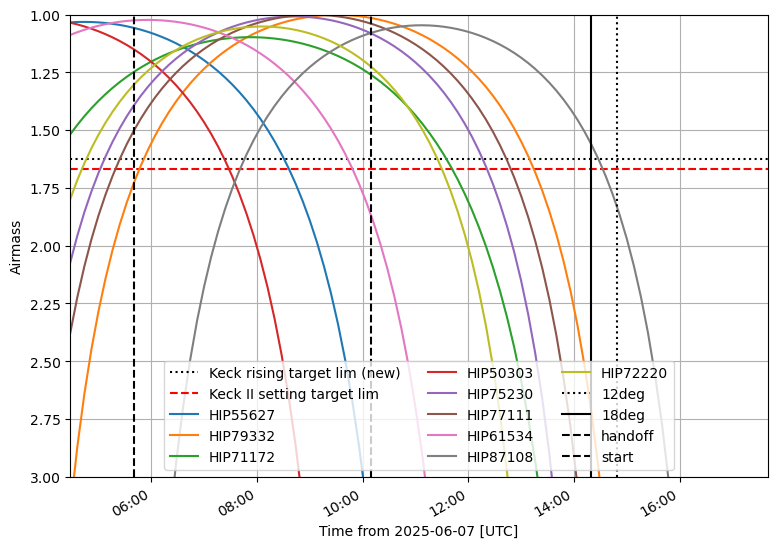

In [37]:

from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(-0.05, 0.5, 100)*u.day   # This needs units 
print(time[0])
plt.figure(figsize=(9,6))


# plt.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
plt.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls=':', label='Keck rising target lim (new)')
plt.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')


# airmass = z = sec(angle)

for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', linestyle='--', color='k')
plt.axvline(start.plot_date, label='start', linestyle='--', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()




In [ ]:
chosen_stds = [HIP53924,HIP55627,HIP75230,HIP77111,HIP87108,HIP61534,HIP72220]


In [39]:
targetlist = pd.read_csv('targets_%s.dat'%date,delim_whitespace=True,index_col=None,comment='#')
vars = globals()
for row,target in targetlist.iterrows():
    vars[target['target']] = astroplan.FixedTarget(coord=SkyCoord(target['ra'],target['dec'], unit=(u.hourangle, u.degree)),
                                  name=target['target'])

targets = targetlist['target']


In [40]:
# astroplan.FixedTarget(coord=SkyCoord(target['ra'],target['dec'], unit=(u.hourangle, u.degree)),
                                  # name=target['target'])
targetlist

,target,ra,dec,mag,band,epoch,type
0,2024xal,03:44:01.35,-14:21:44.4,19,i,150,Ia
1,2025brs,06:18:59.11,-24:37:39.0,17.5,ri,10,Ia
2,2025gj,09:44:20.27,-21:16:22.3,16.3,i,50,Ia
3,2025ifq,10:17:02.31,-38:16:19.0,16,i,10,Ia-91T
4,2025coe,10:33:07.95,+28:26:13.1,16.5,r,10,Ib?
5,2025cfc,10:29:47.53,+13:00:53.7,16.5,r,10,II
6,2024aecx,11:05:49.55,-00:02:05.4,>17?,i,60,Ic
7,2025efa,12:57:28.32,-28:12:06.8,17.5,i,50,Ia
8,2025adj,14:59:44.47,+51:27:47.0,17.2,ri,90,II
9,2025fvw,15:35:25.76,+12:03:28.3,14.5,r,40,Ia


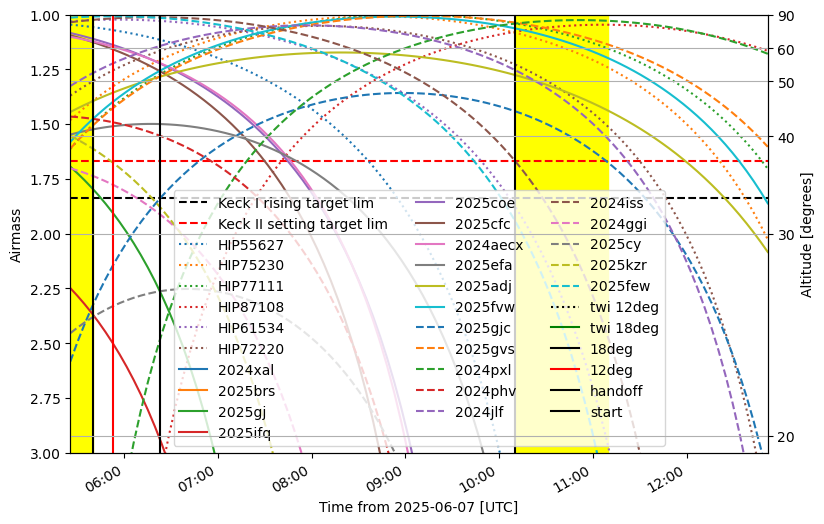

In [41]:

plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck I rising target lim')
# ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')


time = start+np.linspace(-0.01, 0.3, 100)*u.day 

plt.fill_betweenx(x1=handoff.plot_date,x2=(handoff+1*u.hour).plot_date,y=[1,3],color='yellow')
plt.fill_betweenx(x1=(start-0.5*u.hour).plot_date,x2=start.plot_date,y=[1,3],color='yellow')

for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(vars[itarget], observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='twi 12deg', color='k')
ax.axvline(twi18deg.plot_date, label='twi 18deg', color='g')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(pre_twi12deg.plot_date, label='12deg', color='r')

ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(start.plot_date, label='start', color='k')

#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility_%s.pdf'%date)



In [67]:

tab = """target mag exp
2025kzr 15 6x200+300
HIP53924 8.5 4x45+300
HIP71172 9.2 4x45+300
2025adj 18 6x300+300
HIP75230 6.3 4x10+300
2025fvw 16.5 6x300+300
2025gvs 17 6x300+300
HIP79332 6.1 4x10+300
end 99 1x1
"""

# 2025coe 16.5 1x3600+300
# 2024aecx 19 2x1700+300
# 2024ehs 19 2x1700+300
# HIP41798 6.2 2x8+300
#2025cfc 16.5 1x1200+300
# HIP55230 4.7 2x4+300
#2024ggi 16.5 2x1200+300
#2024xal 19 1x1200+300
# HIP16095 6.29 2x4+300
# 2025brs 17.5 1x4200+300
# HIP26698 7.89 2x8+300
# HIP45037 6.53 2x4+300
# 2025gj 16.5 1x3200+300
# HIP52324 6.82 2x4+300

chosen_targets = [vars['2025kzr'],HIP53924,HIP71172,vars['2025adj'],HIP75230,vars['2025fvw'],vars['2025gvs'],HIP79332]
s = """target\tra\tdec\tepoch\n"""

for _all in chosen_targets:
    s+= _all.name+'\t'+_all.coord.to_string(style='hmsdms',sep=':').replace(' ','\t')+'\n'
    print (_all.name+'\t'+_all.coord.to_string(style='hmsdms',sep=':')+'\t'+'2000.0')

s+='end\t00:00:00\t00:00:00\n'
all_targets = pd.read_csv(io.StringIO(s),sep='\t')



2025kzr	10:29:36.43 -24:06:33.6	2000.0
HIP53924	11:02:02.66 -22:09:04.1	2000.0
HIP71172	14:33:23.46 +44:19:53.8	2000.0
2025adj	14:59:44.47 +51:27:47	2000.0
HIP75230	15:22:23.24 +12:34:03	2000.0
2025fvw	15:35:25.76 +12:03:28.3	2000.0
2025gvs	15:50:23.39 +25:55:10	2000.0
HIP79332	16:11:28.74 +16:39:56.4	2000.0


In [68]:
tabla = pd.read_csv(io.StringIO(tab),sep=' ')
dic={'mag':[],'exp':[]}
for indx,t in all_targets.iterrows():
    name = t['target']
    dic['mag'].append(tabla['mag'][tabla['target']==name].values[0])
    dic['exp'].append(tabla['exp'][tabla['target']==name].values[0])

all_targets['mag'] = dic['mag']
all_targets['exp'] = dic['exp']
all_targets['epoch'] = '2000.0'
all_targets


,target,ra,dec,epoch,mag,exp
0,2025kzr,10:29:36.43,-24:06:33.6,2000.0,15.0,6x200+300
1,HIP53924,11:02:02.66,-22:09:04.1,2000.0,8.5,4x45+300
2,HIP71172,14:33:23.46,+44:19:53.8,2000.0,9.2,4x45+300
3,2025adj,14:59:44.47,+51:27:47,2000.0,18.0,6x300+300
4,HIP75230,15:22:23.24,+12:34:03,2000.0,6.3,4x10+300
5,2025fvw,15:35:25.76,+12:03:28.3,2000.0,16.5,6x300+300
6,2025gvs,15:50:23.39,+25:55:10,2000.0,17.0,6x300+300
7,HIP79332,16:11:28.74,+16:39:56.4,2000.0,6.1,4x10+300
8,end,00:00:00,00:00:00,2000.0,99.0,1x1


In [69]:
row_list = tab.split('\n')

nexp = []
exptime = []
overhead = []
for iloc,irow in all_targets.iterrows():
    if '+' in irow['exp']:
        (inexp,iexptime),iextra = irow['exp'].split('+')[0].split('x'),irow['exp'].split('+')[1]
    else:
        (inexp,iexptime),iextra = irow['exp'].split('x'),0

    nexp.append(int(inexp))
    exptime.append(float(iexptime))
    overhead.append(float(iextra))

all_targets['nexp'] = nexp
all_targets['exptime'] = exptime
all_targets['overhead'] = overhead

night_start = start 
#night_start = Time(pre_twi15deg.iso)
readout_time = 60*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start

for iloc,irow in all_targets.iterrows():
    dt = irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']) + slew + irow['overhead']*u.second
    start_time +=dt
    obs_start.append(start_time)
    print(dt)

all_targets['start'] = obs_start[:-1]
all_targets[['target','ra','dec','epoch']].to_csv('./plan_%s.txt'%date,sep='\t',index=False)
all_targets

2160.0 s
1020.0 s
1020.0 s
2760.0 s
880.0 s
2760.0 s
2760.0 s
880.0 s
361.0 s


,target,ra,dec,epoch,mag,exp,nexp,exptime,overhead,start
0,2025kzr,10:29:36.43,-24:06:33.6,2000.0,15.0,6x200+300,6,200.0,300.0,2025-06-07 05:53:00.000
1,HIP53924,11:02:02.66,-22:09:04.1,2000.0,8.5,4x45+300,4,45.0,300.0,2025-06-07 06:29:00.000
2,HIP71172,14:33:23.46,+44:19:53.8,2000.0,9.2,4x45+300,4,45.0,300.0,2025-06-07 06:46:00.000
3,2025adj,14:59:44.47,+51:27:47,2000.0,18.0,6x300+300,6,300.0,300.0,2025-06-07 07:03:00.000
4,HIP75230,15:22:23.24,+12:34:03,2000.0,6.3,4x10+300,4,10.0,300.0,2025-06-07 07:49:00.000
5,2025fvw,15:35:25.76,+12:03:28.3,2000.0,16.5,6x300+300,6,300.0,300.0,2025-06-07 08:03:40.000
6,2025gvs,15:50:23.39,+25:55:10,2000.0,17.0,6x300+300,6,300.0,300.0,2025-06-07 08:49:40.000
7,HIP79332,16:11:28.74,+16:39:56.4,2000.0,6.1,4x10+300,4,10.0,300.0,2025-06-07 09:35:40.000
8,end,00:00:00,00:00:00,2000.0,99.0,1x1,1,1.0,0.0,2025-06-07 09:50:20.000


In [70]:
s="""
#
#  IRTF Star Catalog User List version 3
#     This file contain a user's object list for the star catalog.
#     Observers can add their object in this file and input the list 
#     into the star catalog. 
#     All columns are delimited by spaces.
#
#     Format version 3 is supported from 2023B to present.
#
#     Ref: http://irtfweb.ifa.hawaii.edu/~tcs3/related/starcat/
#
#  Col  Name       Description
#  ---- --------   -----------------------------------------------------
#   1    Index     Numeric index of user list. 
#   2    Name      Name as a string (30 chars max). No spaces allowed. 
#   3    RA        RA  position in ICRS coordinates,  hh:mm:ss.ss. 
#   4    Dec       Dec position in ICRS coordinates, +dd:mm:ss.s.  
#   5    RA_PM     Proper motion of RA  in mas/yr. Use 0.0 if proper motion not known.
#   6    Dec_PM    Proper motion of Dec in mas/yr. Use 0.0 if proper motion not known.
#   7    ST        Spectra Type string (7 chars max). Use "n/a" if not known.
#   8&9  Magn_0    Magn_0 is Magnitude value and character description. Use '0.0 -' if not known.
#  10&11 Magn_1    Magn_1 is optional.  Will use '0.0 -' if not provided. 
#  12&13 Magn_2    Magn_2 is optional.  Will use '0.0 -' if not provided.
#  14&15 Magn_3    Magn_3 is optional.  Will use '0.0 -' if not provided.
#
#Index _________Name________   __ICRS_RA__  _ICRS_DEC__   RA_PM  Dec_PM   __ST___  Magn_0  Magn_1  Magn_2  Magn_3
#     30 chars max,no spaces   hh:mm:ss.ss  +dd:mm:ss.s   mas/y   mas/y  (7chars)  xx.x V  xx.x C  xx.x C  xx.x C
"""
all_targets['RA_PM']='n/a'
all_targets['DEC_PM']='n/a'
all_targets['ST']='n/a'
formats = '%+30s %+12.13s %+12.13s %+10s %+10s %+10s %+10s'
# headers = [format(str(x),y.replace('%+','>')) 
            #   for x, y in zip(all_targets[['target','ra','dec','epoch']].columns,formats.split())]
np.savetxt('starlist_%s.txt'%date, all_targets[['target','ra','dec','RA_PM','DEC_PM','ST','mag']].values, fmt=formats,header=s,comments='')

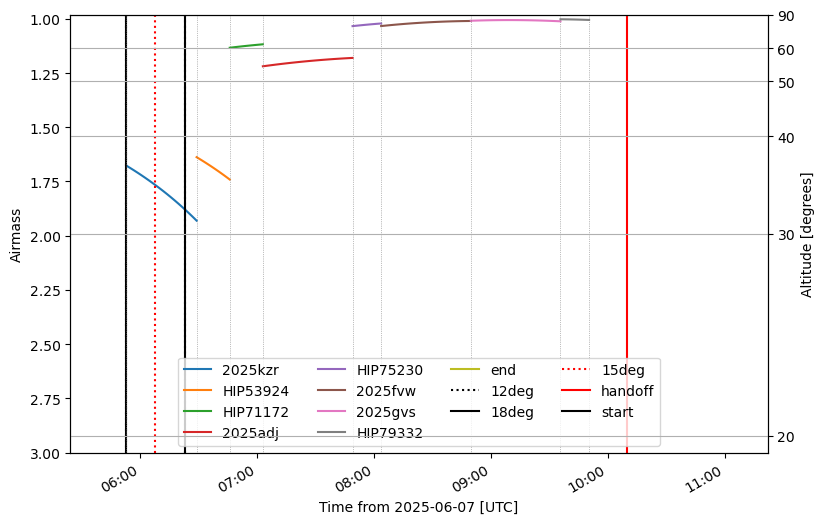

In [71]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)

# ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck I rising target lim')
# ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
# ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)

last_time = handoff

for indx, cycle in enumerate(custom_cycler):
    try:
        irow = all_targets.iloc[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['target'])
    try:
        time = irow['start'] + np.linspace(0,(all_targets.iloc[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
    
ax.axvline(pre_twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(pre_twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='r')
ax.axvline(start.plot_date, label='start', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')

for start_time in all_targets['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=4, loc='lower center')

#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(start.plot_date-0.02, handoff.plot_date+0.05)
ax.set_ylim(ymax=0.98)

plt.grid()
plt.savefig('schedule_%s.pdf'%date)


In [114]:
targetlist = pd.read_csv('backup_%s.dat'%date,delim_whitespace=True,index_col=None)
targetlist
vars = globals()
for row,target in targetlist.iterrows():
    vars[target['target']] = astroplan.FixedTarget(coord=SkyCoord(target['ra'],target['dec'], unit=(u.hourangle, u.degree)),
                                  name=target['target'])

targets = targetlist['target']

FileNotFoundError: [Errno 2] No such file or directory: 'backup_10032025.dat'

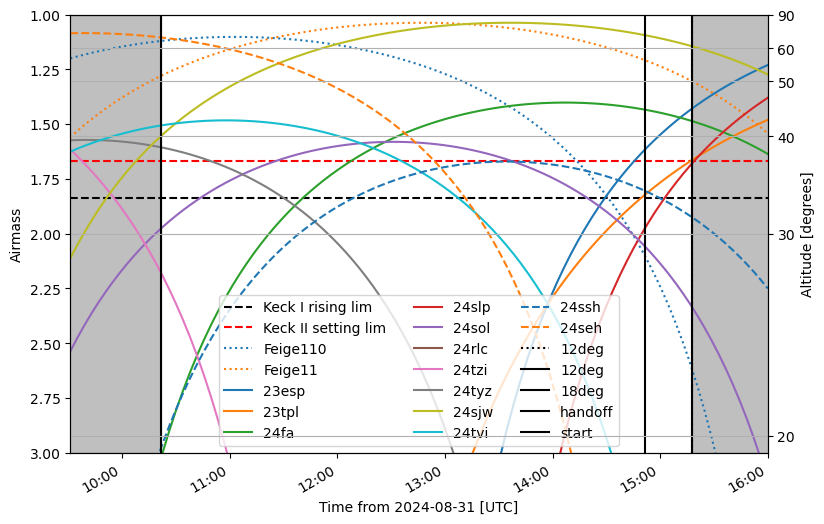

In [283]:

plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck I rising lim')
# ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting lim')


# time = today+np.linspace(-0.01, 0.3, 100)
time = today+np.linspace(-0.02, 0.25, 100)*u.day 

plt.fill_betweenx(x1=handoff.plot_date,x2=(handoff+1*u.hour).plot_date,y=[1,3],color='gray',alpha=0.5)
plt.fill_betweenx(x1=(start-1*u.hour).plot_date,x2=start.plot_date,y=[1,3],color='gray',alpha=0.5)

for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(vars[itarget], observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(start.plot_date, label='start', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':')

#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()


In [160]:
tab = """target mag exp
HIP26698 4.7 2x4+300
2025brs 17.5 1x3600+300
HIP48414 6.02 2x4+300
2025cfc 16.5 1x3600+300
2025gj 16.5 1x3600+300
HIP45712 7.0 2x8+300
2024ggi 16.5 2x1200+300
HIP52324 6.82 2x4+300
end 99 1x1
"""
#2024ggi 16.5 2x1200+300


chosen_targets = [HIP26698,vars['2025brs'],HIP48414,vars['2025cfc'],vars['2025gj'],HIP45712,vars['2024ggi'],HIP52324]

s = """target\tra\tdec\tepoch\n"""

for _all in chosen_targets:
    s+= _all.name+'\t'+_all.coord.to_string(style='hmsdms',sep=':').replace(' ','\t')+'\n'
    print (_all.name+'\t'+_all.coord.to_string(style='hmsdms',sep=':')+'\t'+'2000.0')

s+='end\t00:00:00\t00:00:00\n'
all_targets = pd.read_csv(io.StringIO(s),sep='\t')
tabla

HIP26698	05:40:25.46 -22:38:54	2000.0
2025brs	06:18:59.11 -24:37:39	2000.0
HIP48414	09:52:12.16 +02:27:14.8	2000.0
2025cfc	10:29:47.53 +13:00:53.7	2000.0
2025gj	09:44:20.27 -21:16:22.3	2000.0
HIP45712	09:19:07.86 -22:33:11	2000.0
2024ggi	11:18:22.09 -32:50:15.3	2000.0
HIP52324	10:41:30.34 -35:43:52	2000.0


,target,mag,exp
0,HIP26698,4.70,2x4+300
1,2025brs,17.50,1x3600+300
2,HIP48414,6.02,2x4+300
3,2025cfc,16.50,1x3600+300
4,2025gj,16.50,1x3600+300
5,HIP45712,7.00,2x8+300
6,end,99.00,1x1


In [161]:
tabla = pd.read_csv(io.StringIO(tab),sep=' ')
dic={'mag':[],'exp':[]}
for indx,t in all_targets.iterrows():
    name = t['target']
    dic['mag'].append(tabla['mag'][tabla['target']==name].values[0])
    dic['exp'].append(tabla['exp'][tabla['target']==name].values[0])

all_targets['mag'] = dic['mag']
all_targets['exp'] = dic['exp']
l=list(observer.altaz(start,chosen_targets).az.deg)
l.append(0)
all_targets['az'] = l
all_targets['daz'] = [0]+list(np.diff(l))

all_targets

,target,ra,dec,epoch,mag,exp,az,daz
0,HIP26698,05:40:25.46,-22:38:54,NaN,4.70,2x4+300,177.610992,0.000000
1,2025brs,06:18:59.11,-24:37:39,NaN,17.50,1x3600+300,165.515085,-12.095908
2,HIP48414,09:52:12.16,+02:27:14.8,NaN,6.02,2x4+300,96.703038,-68.812047
3,2025cfc,10:29:47.53,+13:00:53.7,NaN,16.50,1x3600+300,82.736131,-13.966907
4,2025gj,09:44:20.27,-21:16:22.3,NaN,16.50,1x3600+300,120.502308,37.766178
5,HIP45712,09:19:07.86,-22:33:11,NaN,7.00,2x8+300,124.847099,4.344791
6,2024ggi,11:18:22.09,-32:50:15.3,NaN,16.50,2x1200+300,122.362965,-2.484134
7,HIP52324,10:41:30.34,-35:43:52,NaN,6.82,2x4+300,127.806366,5.443401
8,end,00:00:00,00:00:00,NaN,99.00,1x1,0.000000,-127.806366


In [162]:
row_list = tab.split('\n')

nexp = []
exptime = []
overhead = []
for iloc,irow in all_targets.iterrows():
    if '+' in irow['exp']:
        (inexp,iexptime),iextra = irow['exp'].split('+')[0].split('x'),irow['exp'].split('+')[1]
    else:
        (inexp,iexptime),iextra = irow['exp'].split('x'),0

    nexp.append(int(inexp))
    exptime.append(float(iexptime))
    overhead.append(float(iextra))

all_targets['nexp'] = nexp
all_targets['exptime'] = exptime
all_targets['overhead'] = overhead


night_start = start
#night_start = Time(pre_twi15deg.iso)
readout_time = 60*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start

for iloc,irow in all_targets.iterrows():
    dt = irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']) + slew + irow['overhead']*u.second
    start_time +=dt
    obs_start.append(start_time)
    print(dt)


all_targets['start'] = obs_start[:-1]
all_targets.to_csv('./backupplan.txt',sep=',')
all_targets

728.0 s
4260.0 s
728.0 s
4260.0 s
4260.0 s
736.0 s
3120.0 s
728.0 s
361.0 s


,target,ra,dec,epoch,mag,exp,az,daz,nexp,exptime,overhead,start
0,HIP26698,05:40:25.46,-22:38:54,NaN,4.70,2x4+300,177.610992,0.000000,2,4.0,300.0,2025-03-11 04:40:00.000
1,2025brs,06:18:59.11,-24:37:39,NaN,17.50,1x3600+300,165.515085,-12.095908,1,3600.0,300.0,2025-03-11 04:52:08.000
2,HIP48414,09:52:12.16,+02:27:14.8,NaN,6.02,2x4+300,96.703038,-68.812047,2,4.0,300.0,2025-03-11 06:03:08.000
3,2025cfc,10:29:47.53,+13:00:53.7,NaN,16.50,1x3600+300,82.736131,-13.966907,1,3600.0,300.0,2025-03-11 06:15:16.000
4,2025gj,09:44:20.27,-21:16:22.3,NaN,16.50,1x3600+300,120.502308,37.766178,1,3600.0,300.0,2025-03-11 07:26:16.000
5,HIP45712,09:19:07.86,-22:33:11,NaN,7.00,2x8+300,124.847099,4.344791,2,8.0,300.0,2025-03-11 08:37:16.000
6,2024ggi,11:18:22.09,-32:50:15.3,NaN,16.50,2x1200+300,122.362965,-2.484134,2,1200.0,300.0,2025-03-11 08:49:32.000
7,HIP52324,10:41:30.34,-35:43:52,NaN,6.82,2x4+300,127.806366,5.443401,2,4.0,300.0,2025-03-11 09:41:32.000
8,end,00:00:00,00:00:00,NaN,99.00,1x1,0.000000,-127.806366,1,1.0,0.0,2025-03-11 09:53:40.000


In [163]:
s="""
#
#  IRTF Star Catalog User List version 3
#     This file contain a user's object list for the star catalog.
#     Observers can add their object in this file and input the list 
#     into the star catalog. 
#     All columns are delimited by spaces.
#
#     Format version 3 is supported from 2023B to present.
#
#     Ref: http://irtfweb.ifa.hawaii.edu/~tcs3/related/starcat/
#
#  Col  Name       Description
#  ---- --------   -----------------------------------------------------
#   1    Index     Numeric index of user list. 
#   2    Name      Name as a string (30 chars max). No spaces allowed. 
#   3    RA        RA  position in ICRS coordinates,  hh:mm:ss.ss. 
#   4    Dec       Dec position in ICRS coordinates, +dd:mm:ss.s.  
#   5    RA_PM     Proper motion of RA  in mas/yr. Use 0.0 if proper motion not known.
#   6    Dec_PM    Proper motion of Dec in mas/yr. Use 0.0 if proper motion not known.
#   7    ST        Spectra Type string (7 chars max). Use "n/a" if not known.
#   8&9  Magn_0    Magn_0 is Magnitude value and character description. Use '0.0 -' if not known.
#  10&11 Magn_1    Magn_1 is optional.  Will use '0.0 -' if not provided. 
#  12&13 Magn_2    Magn_2 is optional.  Will use '0.0 -' if not provided.
#  14&15 Magn_3    Magn_3 is optional.  Will use '0.0 -' if not provided.
#
#Index _________Name________   __ICRS_RA__  _ICRS_DEC__   RA_PM  Dec_PM   __ST___  Magn_0  Magn_1  Magn_2  Magn_3
#     30 chars max,no spaces   hh:mm:ss.ss  +dd:mm:ss.s   mas/y   mas/y  (7chars)  xx.x V  xx.x C  xx.x C  xx.x C
"""
all_targets['RA_PM']='n/a'
all_targets['DEC_PM']='n/a'
all_targets['ST']='n/a'
formats = '%+30s %+12.13s %+12.13s %+10s %+10s %+10s %+10s'
# headers = [format(str(x),y.replace('%+','>')) 
            #   for x, y in zip(all_targets[['target','ra','dec','epoch']].columns,formats.split())]
np.savetxt('backup_10032025.txt', all_targets[['target','ra','dec','RA_PM','DEC_PM','ST','mag']].values, fmt=formats,header=s,comments='')

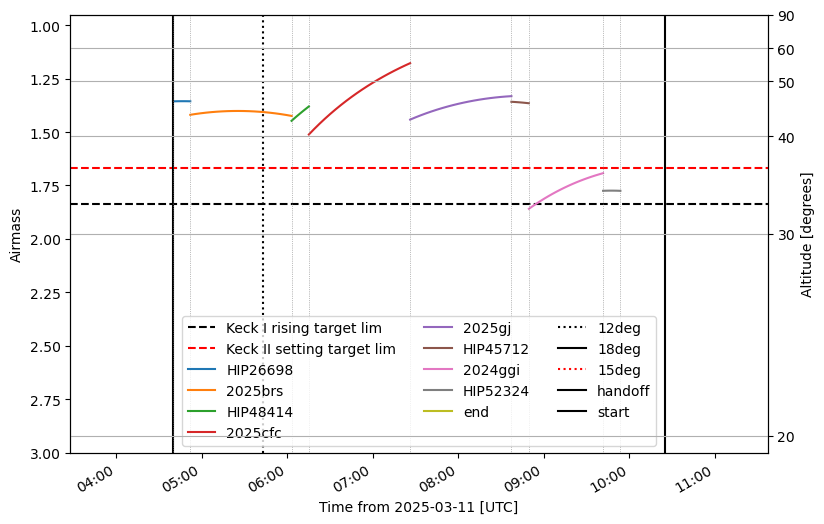

In [164]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)

ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck I rising target lim')
# ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')

#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)

last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = all_targets.iloc[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['target'])
    try:
        time = irow['start'] + np.linspace(0,(all_targets.iloc[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
    
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(start.plot_date, label='start', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in all_targets['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(start.plot_date-0.05, handoff.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
# plt.savefig('schedule.pdf')